In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/large-industrial-pump-maintenance-dataset/Large_Industrial_Pump_Maintenance_Dataset.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/kaggle/input/large-industrial-pump-maintenance-dataset/Large_Industrial_Pump_Maintenance_Dataset.csv")

## Data Quality Checks

In [4]:
df.head()

,Pump_ID,Temperature,Vibration,Pressure,Flow_Rate,RPM,Operational_Hours,Maintenance_Flag
0,2,127.508350,2.369397,136.021029,6.501492,1444.191922,3966.793672,1
1,4,88.975185,4.541126,147.516973,7.001516,1004.802496,3673.288933,0
2,3,61.832325,2.542112,220.858577,8.824368,2597.662712,5489.061016,1
3,3,106.250344,2.834452,145.817091,16.283512,2280.926281,3134.783015,0
4,2,84.815865,3.119709,235.476221,8.385183,2594.131667,761.533173,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pump_ID            20000 non-null  int64  
 1   Temperature        20000 non-null  float64
 2   Vibration          20000 non-null  float64
 3   Pressure           20000 non-null  float64
 4   Flow_Rate          20000 non-null  float64
 5   RPM                20000 non-null  float64
 6   Operational_Hours  20000 non-null  float64
 7   Maintenance_Flag   20000 non-null  int64  
dtypes: float64(6), int64(2)
memory usage: 1.2 MB


In [6]:
df.isnull().sum()

Pump_ID              0
Temperature          0
Vibration            0
Pressure             0
Flow_Rate            0
RPM                  0
Operational_Hours    0
Maintenance_Flag     0
dtype: int64

In [7]:
df.iloc[:,1:].describe()

,Temperature,Vibration,Pressure,Flow_Rate,RPM,Operational_Hours,Maintenance_Flag
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,100.371340,2.527856,200.381615,10.248111,2005.617191,5030.481037,0.49840
std,28.851380,1.416466,57.823085,5.646254,576.506659,2867.804461,0.50001
min,50.001091,0.100427,100.007052,0.500453,1000.041781,100.213880,0.00000
25%,75.403208,1.300199,149.858536,5.354906,1506.073027,2531.552283,0.00000
50%,100.752882,2.517715,200.513919,10.284599,2009.733748,5032.760791,0.00000
75%,125.422558,3.755519,250.271651,15.149339,2503.339719,7504.463849,1.00000
max,149.995262,4.999804,299.980845,19.999434,2999.915184,9998.768972,1.00000


In [8]:
df = df.sort_values(
    by=["Pump_ID", "Operational_Hours"]
)


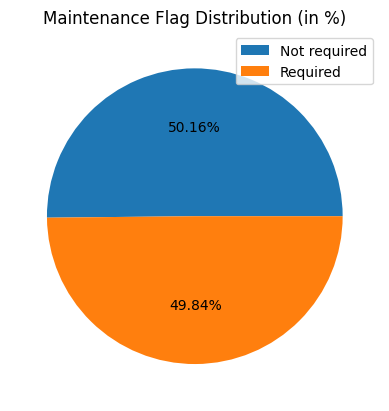

In [9]:
#checking target variable distribution
plt.pie(df['Maintenance_Flag'].value_counts(normalize=True),autopct="%.2f%%")
plt.title("Maintenance Flag Distribution (in %)")
plt.legend(labels=['Not required','Required'])
plt.show()

## Univariate Analysis against Maintenance Flag

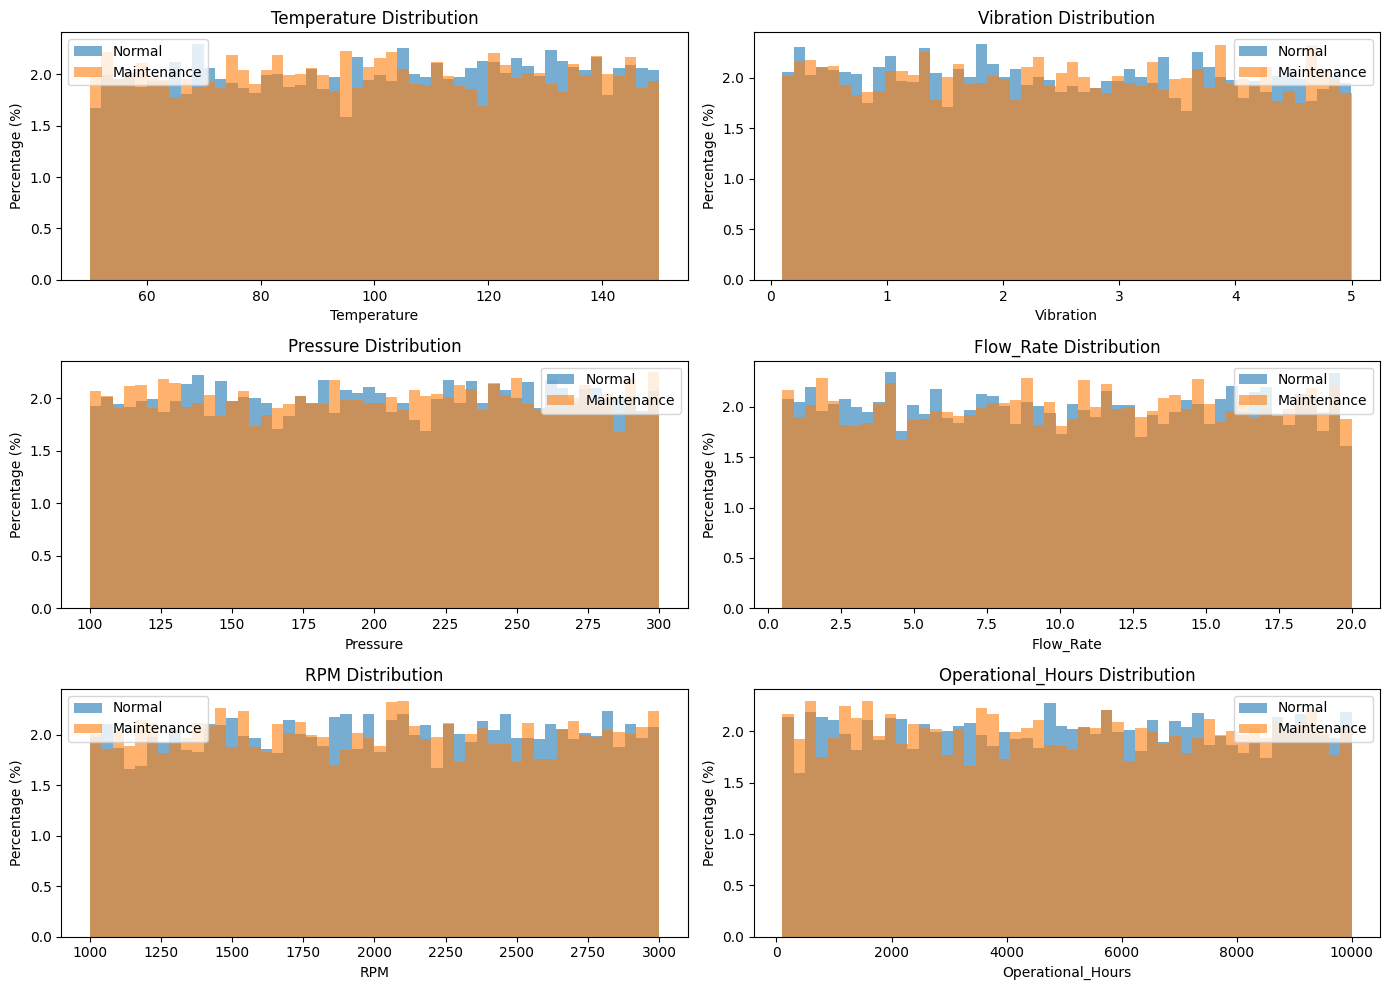

In [10]:
fig, axes = plt.subplots(3, 2, figsize=(14, 10))

features = df.iloc[:, 1:-1].columns  # exclude Pump_ID and maintenance_flag

for i, column in enumerate(features):
    row = i // 2
    col = i % 2

    normal = df[df["Maintenance_Flag"] == 0][column]
    maint  = df[df["Maintenance_Flag"] == 1][column]

    # percentage weights
    w_normal = np.ones(len(normal)) / len(normal) * 100
    w_maint  = np.ones(len(maint))  / len(maint)  * 100

    axes[row, col].hist(
        normal,
        bins=50,
        weights=w_normal,
        alpha=0.6,
        label="Normal"
    )

    axes[row, col].hist(
        maint,
        bins=50,
        weights=w_maint,
        alpha=0.6,
        label="Maintenance"
    )

    axes[row, col].set_title(f"{column} Distribution")
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel("Percentage (%)")
    axes[row, col].legend()

plt.tight_layout()
plt.show()


All the feature colums have a uniform distribution

In [11]:
df.groupby("Maintenance_Flag").mean()


,Pump_ID,Temperature,Vibration,Pressure,Flow_Rate,RPM,Operational_Hours
Maintenance_Flag,,,,,,,
0,3.013656,100.746785,2.517161,200.679232,10.199296,2010.538768,5039.337827
1,2.993379,99.993484,2.538619,200.082087,10.297241,2000.664014,5021.567381


## Correlation Analysis

<Axes: >

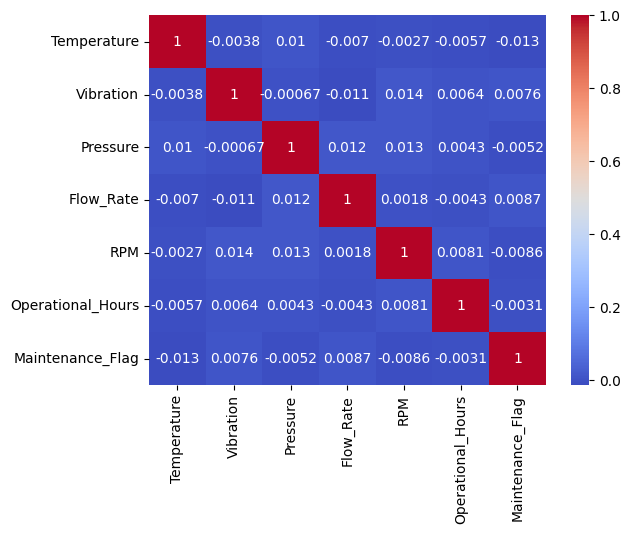

In [12]:
corr = df.drop("Pump_ID", axis=1).corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")


## Pump wise trend analysis against operational hours

In [13]:
df["Pump_ID"].value_counts()


Pump_ID
2    4129
4    4036
5    3993
3    3931
1    3911
Name: count, dtype: int64

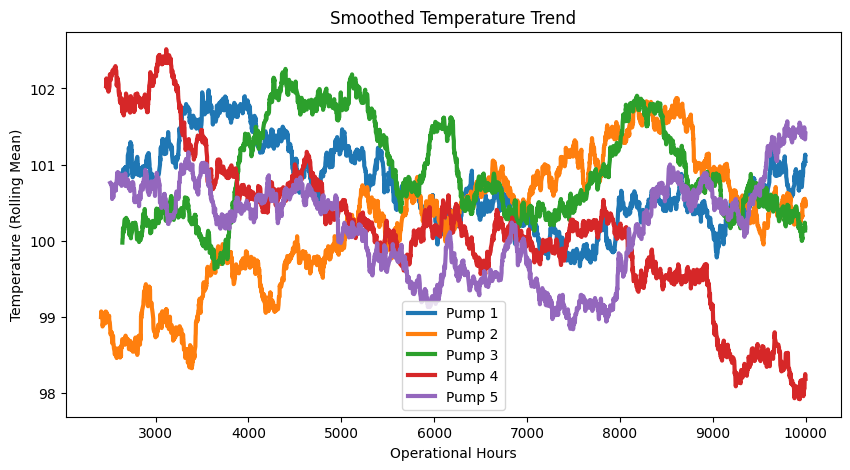

In [14]:
plt.figure(figsize=(10,5))

for pid in df["Pump_ID"].unique():
    subset = df[df["Pump_ID"] == pid]

    rolling = subset["Temperature"].rolling(1000).mean()

    plt.plot(
        subset["Operational_Hours"],
        rolling,
        label=f"Pump {pid}",
        linewidth =3
    )

plt.xlabel("Operational Hours")
plt.ylabel("Temperature (Rolling Mean)")
plt.title("Smoothed Temperature Trend")
plt.legend()
plt.show()


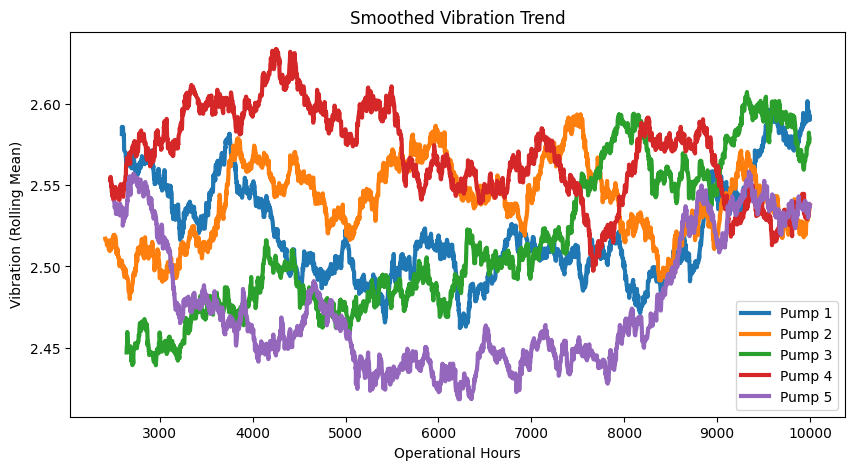

In [15]:
plt.figure(figsize=(10,5))

for pid in df["Pump_ID"].unique():
    subset = df[df["Pump_ID"] == pid]

    rolling = subset["Vibration"].rolling(1000).mean()

    plt.plot(
        subset["Operational_Hours"],
        rolling,
        label=f"Pump {pid}",
        linewidth=3
    )

plt.xlabel("Operational Hours")
plt.ylabel("Vibration (Rolling Mean)")
plt.title("Smoothed Vibration Trend")
plt.legend()
plt.show()


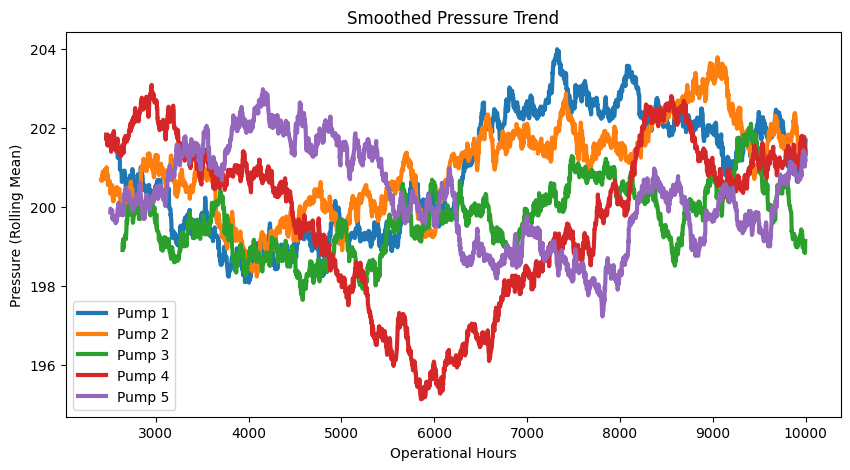

In [16]:
plt.figure(figsize=(10,5))

for pid in df["Pump_ID"].unique():
    subset = df[df["Pump_ID"] == pid]

    rolling = subset["Pressure"].rolling(1000).mean()

    plt.plot(
        subset["Operational_Hours"],
        rolling,
        label=f"Pump {pid}",
        linewidth=3
    )

plt.xlabel("Operational Hours")
plt.ylabel("Pressure (Rolling Mean)")
plt.title("Smoothed Pressure Trend")
plt.legend()
plt.show()


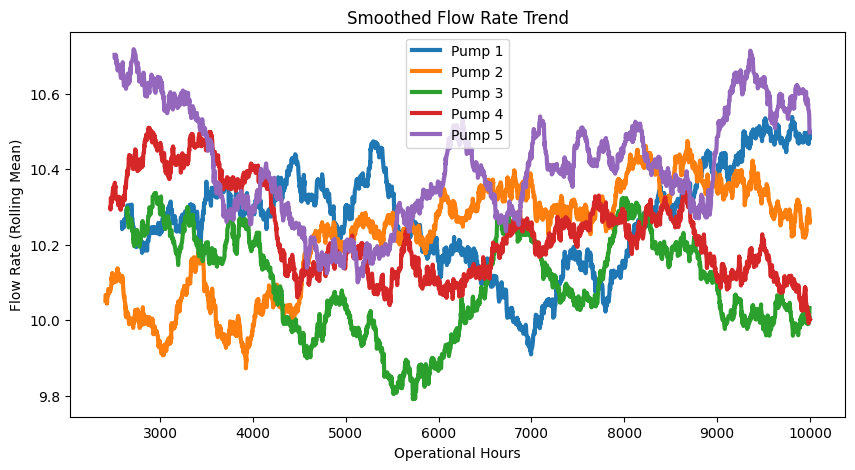

In [17]:
plt.figure(figsize=(10,5))

for pid in df["Pump_ID"].unique():
    subset = df[df["Pump_ID"] == pid]

    rolling = subset["Flow_Rate"].rolling(1000).mean()

    plt.plot(
        subset["Operational_Hours"],
        rolling,
        label=f"Pump {pid}",
        linewidth=3
    )

plt.xlabel("Operational Hours")
plt.ylabel("Flow Rate (Rolling Mean)")
plt.title("Smoothed Flow Rate Trend")
plt.legend()
plt.show()


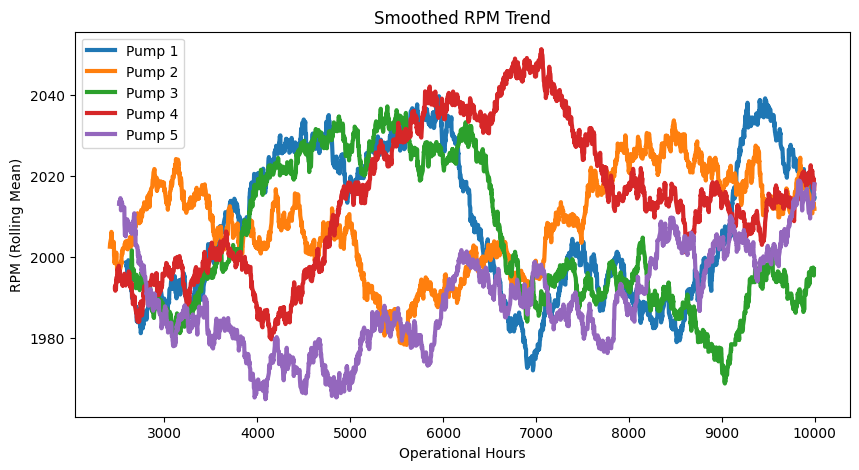

In [18]:
plt.figure(figsize=(10,5))

for pid in df["Pump_ID"].unique():
    subset = df[df["Pump_ID"] == pid]

    rolling = subset["RPM"].rolling(1000).mean()

    plt.plot(
        subset["Operational_Hours"],
        rolling,
        label=f"Pump {pid}",
        linewidth=3
    )

plt.xlabel("Operational Hours")
plt.ylabel("RPM (Rolling Mean)")
plt.title("Smoothed RPM Trend")
plt.legend()
plt.show()


## Check for outliers

<Axes: xlabel='Pump_ID', ylabel='Temperature'>

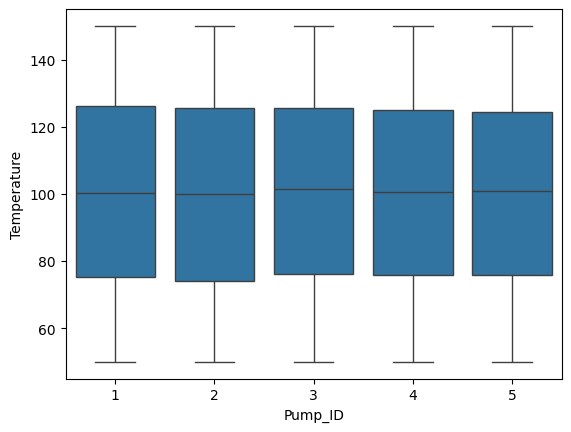

In [19]:
sns.boxplot(data=df, x="Pump_ID", y="Temperature")


<Axes: xlabel='Pump_ID', ylabel='Pressure'>

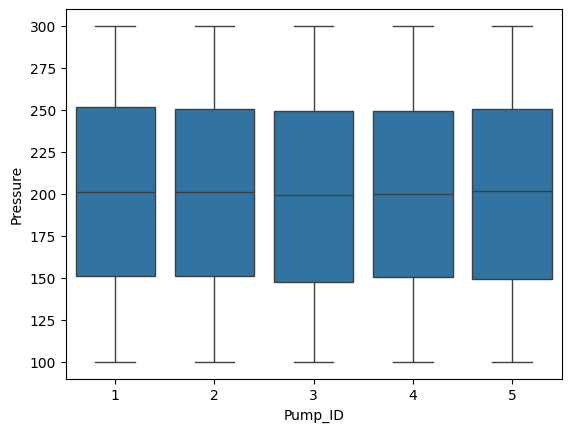

In [20]:
sns.boxplot(data=df, x="Pump_ID", y="Pressure")


<Axes: xlabel='Pump_ID', ylabel='Vibration'>

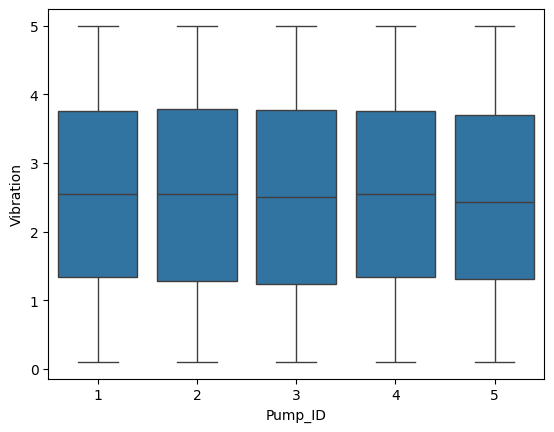

In [21]:
sns.boxplot(data=df, x="Pump_ID", y="Vibration")


<Axes: xlabel='Pump_ID', ylabel='RPM'>

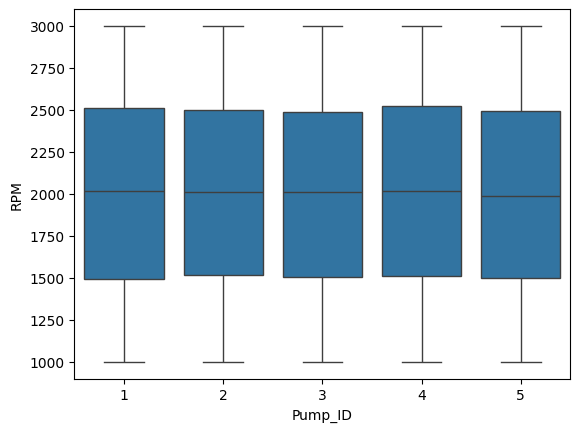

In [22]:
sns.boxplot(data=df, x="Pump_ID", y="RPM")


<Axes: xlabel='Pump_ID', ylabel='Operational_Hours'>

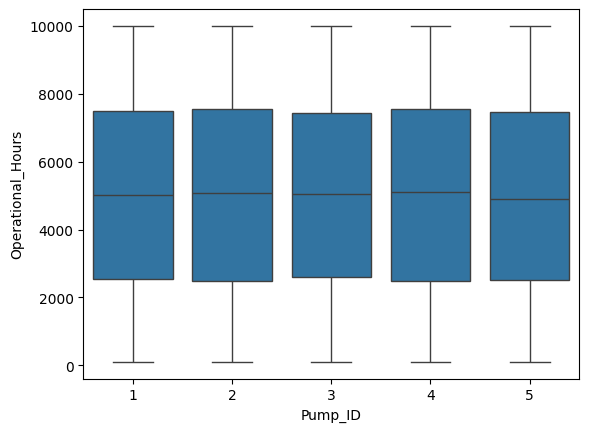

In [23]:
sns.boxplot(data=df, x="Pump_ID", y="Operational_Hours")


## Feature Engineering to check for underlying relationships

In [24]:
rolling_df = pd.DataFrame()

In [25]:
for column in df.iloc[:,1:-1].columns:
    rolling_df[column+"_diff"] = df.groupby("Pump_ID")[column].diff()
    
    rolling_df[column+"_rolling_mean"] = (
        df.groupby("Pump_ID")[column]
          .rolling(200)
          .mean()
          .reset_index(0, drop=True)
    )
    
    rolling_df[column+"_rolling_std"] = (
        df.groupby("Pump_ID")[column]
          .rolling(200)
          .std()
          .reset_index(0, drop=True)
    )
rolling_df['Maintenance_Flag'] = df['Maintenance_Flag']

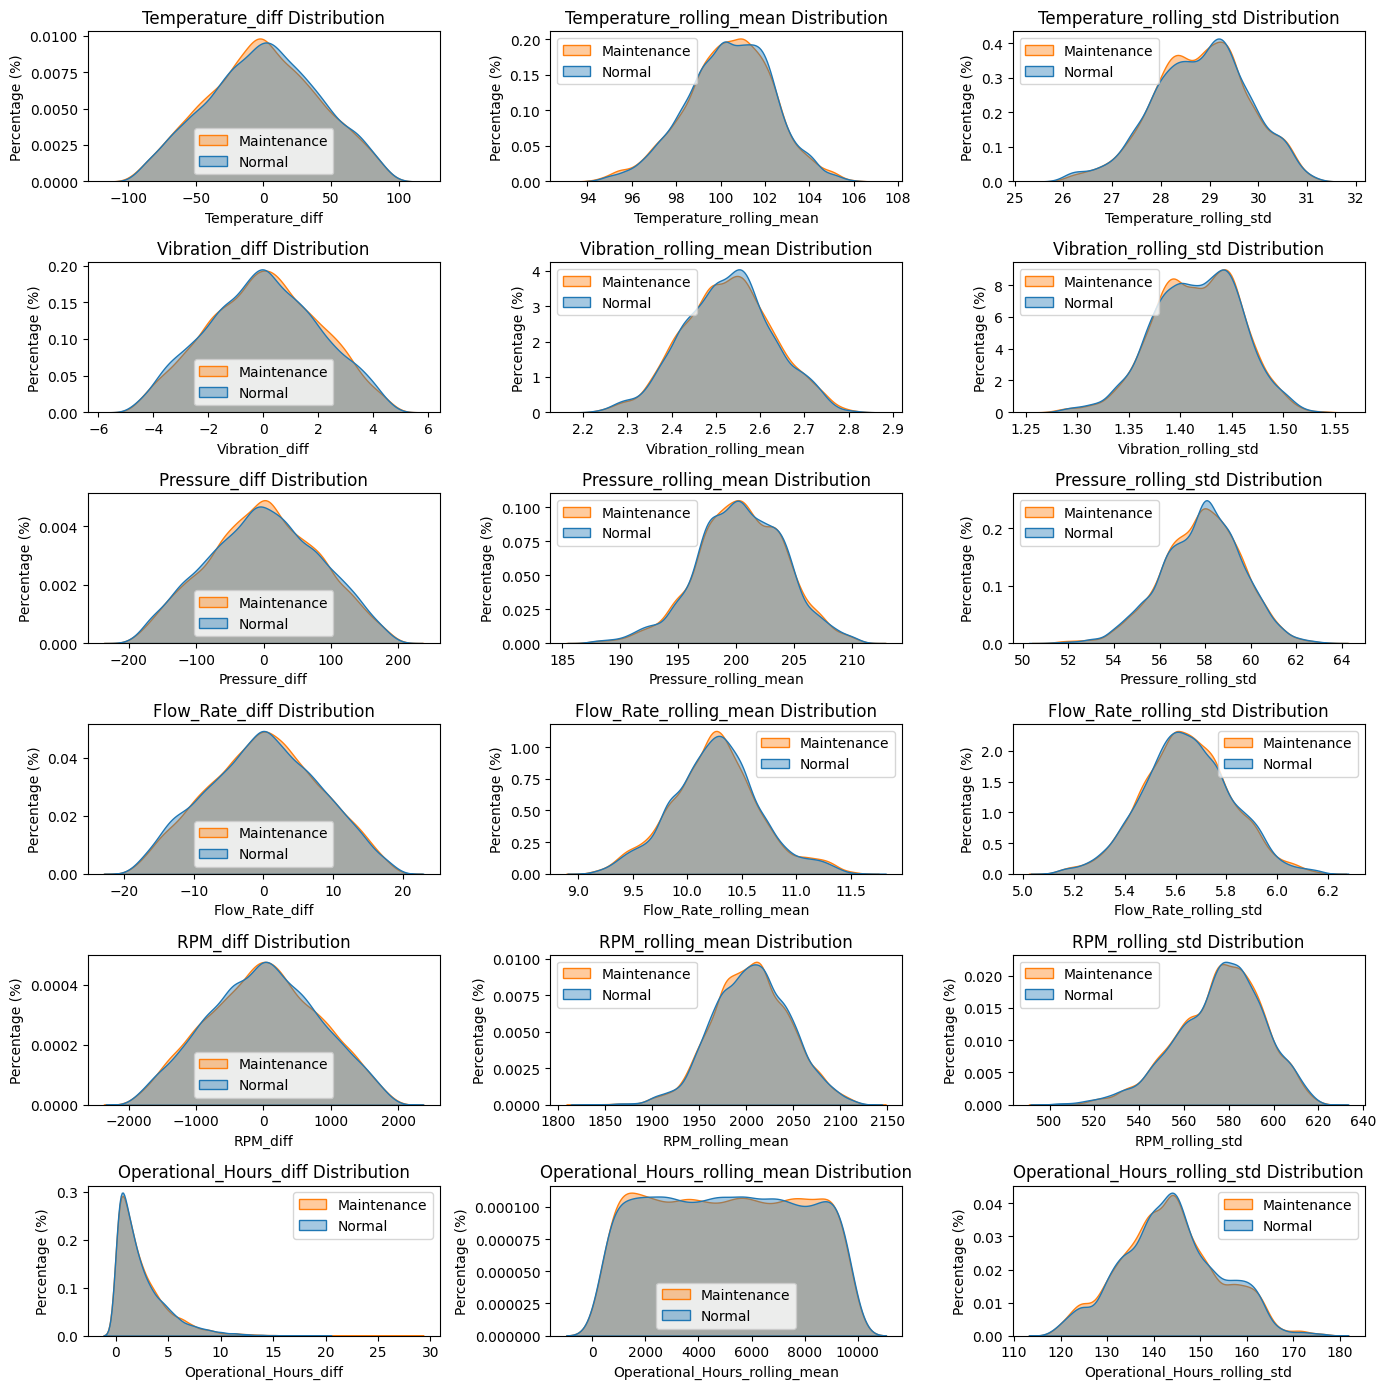

In [26]:
fig, axes = plt.subplots(6, 3, figsize=(14, 14))

features = rolling_df.iloc[:,:-1].columns  # exclude Pump_ID and maintenance_flag

for i, column in enumerate(features):
    
    row = i//3
    col = i%3
    
    sns.kdeplot(
        data=rolling_df,
        x=column,
        hue="Maintenance_Flag",
        fill=True,
        common_norm=False,
        alpha=0.4,
        ax=axes[row,col]
    )
    axes[row,col].set_title(f"{column} Distribution")
    axes[row,col].set_xlabel(column)
    axes[row,col].set_ylabel("Percentage (%)")
    axes[row,col].legend(labels=['Maintenance','Normal'])

plt.tight_layout()
plt.show()


In [27]:
feature_df = pd.DataFrame()
feature_df["temp_vibration_ratio"] = df["Temperature"] / df["Vibration"]
feature_df["pressure_flow_ratio"] = df["Pressure"] / df["Flow_Rate"]
feature_df["rpm_flow_efficiency"] = df["Flow_Rate"] / df["RPM"]
feature_df["Maintenance_Flag"] = df["Maintenance_Flag"]

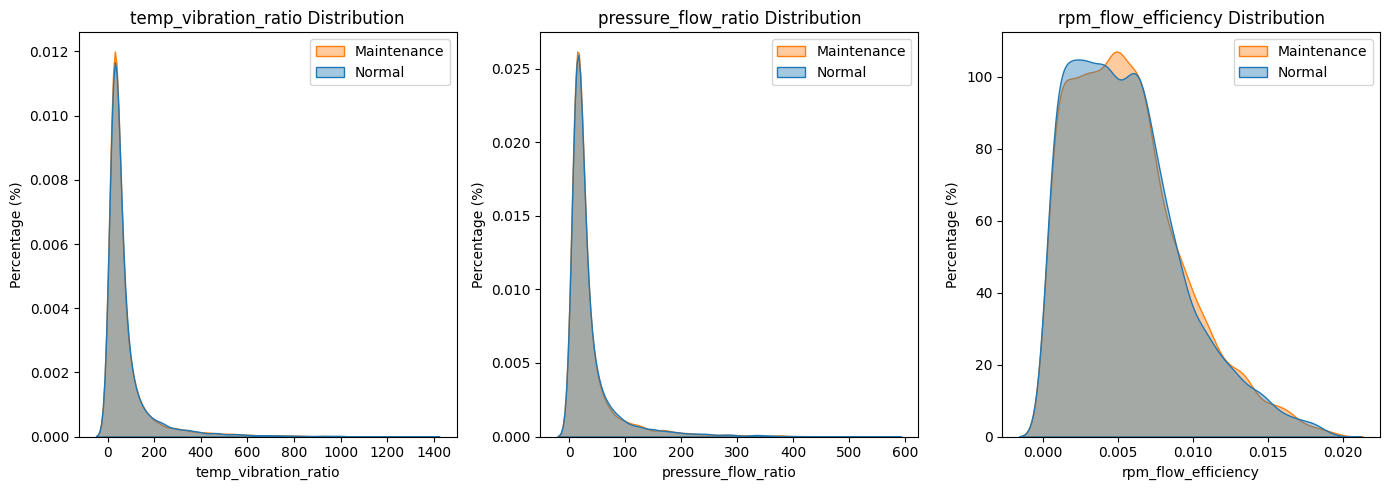

In [28]:
fig, axes = plt.subplots(1, 3, figsize=(14, 5))

features = feature_df.iloc[:,:-1].columns  # exclude Pump_ID and maintenance_flag

for i, column in enumerate(features):
    
    row = i//3
    col = i%3
    
    sns.kdeplot(
        data=feature_df,
        x=column,
        hue="Maintenance_Flag",
        fill=True,
        common_norm=False,
        alpha=0.4,
        ax=axes[col]
    )
    axes[col].set_title(f"{column} Distribution")
    axes[col].set_xlabel(column)
    axes[col].set_ylabel("Percentage (%)")
    axes[col].legend(labels=['Maintenance','Normal'])

plt.tight_layout()
plt.show()


<Axes: >

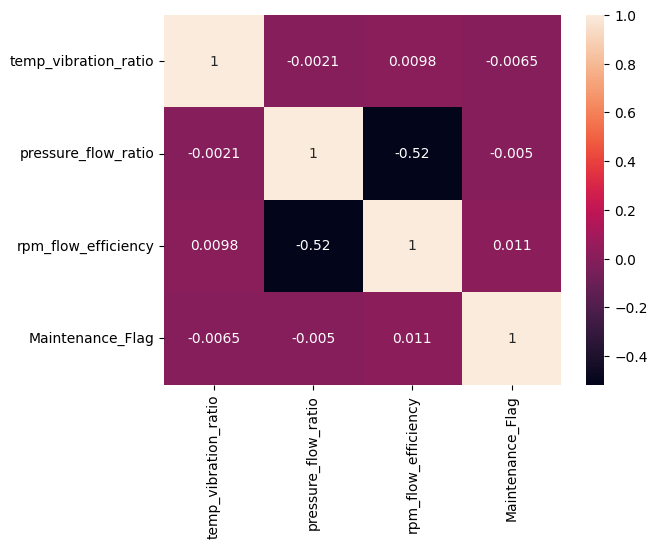

In [29]:
corr = feature_df.corr()
sns.heatmap(corr,annot=True)

## Final Conclusions

-> All sensor features exhibit a uniform distribution with substantial overlap between maintenance required and not required data points.

-> Features exhibit very weak linear relationships amongst themselves as well as with maintenance flag.

-> Pump wise temporal analysis, using rolling means, did not reveal any degradation patterns with increasing operational hours.

-> Multiple feature engineering approaches were evaluated, including differencing, rolling means, rolling standard deviations and ratio-based features. None produced meaningful separation between maintenance and non-maintenance observations.

### Overall, the analysis indicates that the provided sensor measurements do not contain sufficient signal to reliably predict maintenance events.